1. Data Cleansing


In [1]:
import pandas as pd

In [2]:
def load_data(filename):
    return pd.read_csv(filename)

In [3]:
filename = "titanic_disaster.csv"
tidisater = load_data(filename)
tidisater.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat
map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked


PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64
PassengerId    687
Survived       687
Pclass         687
Name           687
Sex            687
Age            529
SibSp          687
Parch          687
Ticket         687
Fare           687
Cabin            0
Embarked       687
dtype: int64
PassengerId    2
Survived       2
Pclass         2
Name           2
Sex            2
Age            2
SibSp          2
Parch          2
Ticket         2
Fare           2
Cabin          2
Embarked       0
dtype: int64


<Axes: >

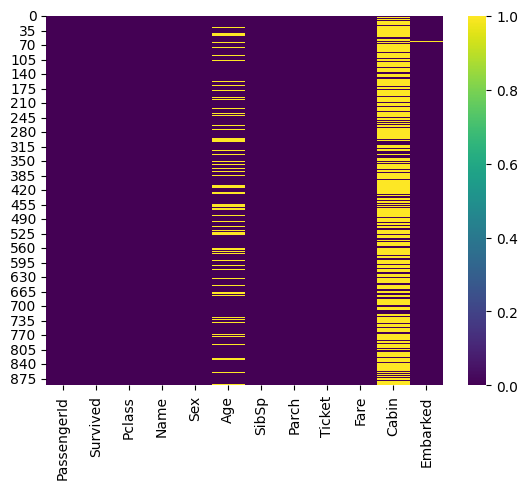

In [4]:
dfage = tidisater[tidisater['Age'].isna()]
print(dfage.count())
dfage = tidisater[tidisater['Cabin'].isna()]
print(dfage.count())

dfembarked = tidisater[tidisater['Embarked'].isna()]
print(dfembarked.count())

import seaborn as sns
sns.heatmap(tidisater.isna(),cmap='viridis')
# có 0 dòng dữ liệu age = null
# có 0 dòng dữ liệu cabin = null
# có 177 dong dữ liệu embarked = null

3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi
tách cột xong thì xóa luôn cột Name


In [5]:
tidisater [['fistName','secondName']]= tidisater['Name'].str.split(',',expand = True)
tidisater_splitname = tidisater.drop("Name",axis=1)
tidisater_splitname.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fistName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F

In [6]:
tidisater['Sex'] = tidisater['Sex'].replace({'male': 'M', 'female': 'F'})
tidisater


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fistName,secondName
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",M,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",F,19.0,0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",F,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",M,26.0,0,0,111369,30.0000,C148,C,Behr,Mr. Karl Howell


5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa
ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng
vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau
a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân
phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm
hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.

<Axes: xlabel='Pclass', ylabel='Age'>

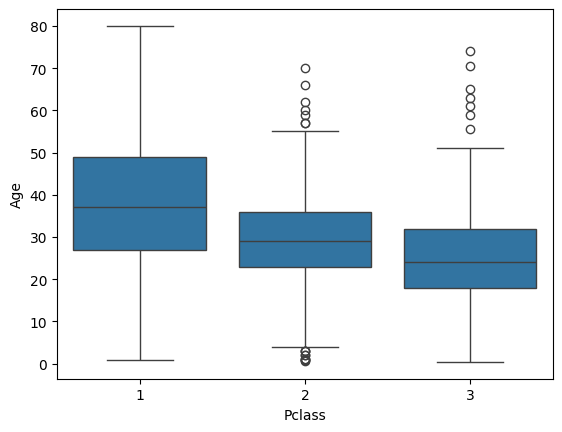

In [7]:
import seaborn as sns
sns.boxplot(y='Age',x='Pclass',data=tidisater)

b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực
quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map.

In [8]:
tidisater.loc[tidisater["Pclass"] == 1, "Age"] = tidisater.loc[tidisater["Pclass"] == 1, "Age"].fillna(tidisater.loc[tidisater["Pclass"] == 1, "Age"].median())
tidisater.loc[tidisater["Pclass"] == 2, "Age"] = tidisater.loc[tidisater["Pclass"] == 2, "Age"].fillna(tidisater.loc[tidisater["Pclass"] == 2, "Age"].median())
tidisater.loc[tidisater["Pclass"] == 3, "Age"] = tidisater.loc[tidisater["Pclass"] == 3, "Age"].fillna(tidisater.loc[tidisater["Pclass"] == 3, "Age"].median())


In [9]:

import seaborn as  sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(tidisater.isna(), yticklabels= False, cbar=True,cmap='viridis')


<Axes: >

6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa
trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult
và ( age > 60): Older

In [10]:
#
# tidisater['Agegroup'] = pd.cut(tidisater['Age'], bins=[-float('inf'), 12, 18, 60, float('inf')], labels=['Kid', 'Teen', 'Adult', 'Older'], right=True)
tidisater.loc[(tidisater['Age']<=12),'Agegroup']='Kid'
tidisater.loc[(tidisater['Age']>12)&(tidisater['Age']<18),'Agegroup']='Teen'
tidisater.loc[(tidisater['Age']>18)&(tidisater['Age']<=60),'Agegroup']='Adult'
tidisater.loc[(tidisater['Age']>60),'Agegroup']='Older'
tidisater.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fistName,secondName,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult
5,6,0,3,"Moran, Mr. James",M,24.0,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen


7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr,
Mrs, Miss, Master ra khỏi “secondName”

In [11]:
# tidisater ['fistName']= tidisater['Name'].str.split(',',expand = True)
prefix = ['Mr. ','Mrs. ', 'Miss. ', 'Master. ']
tidisater['namePrefix'] = tidisater['secondName'].str.extract(f"({'|'.join(prefix)})")
tidisater['secondName'] = tidisater['secondName'].str.replace(f"{'|'.join(prefix)}", "", regex=True).str.strip()
tidisater.head(15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fistName,secondName,Agegroup,namePrefix
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,Mrs.
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult,Mr.
5,6,0,3,"Moran, Mr. James",M,24.0,0,0,330877,8.4583,NaN,Q,Moran,James,Adult,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Timothy J,Adult,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Gosta Leonard,Kid,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Oscar W (Elisabeth Vilhelmina Berg),Adult,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Nicholas (Adele Achem),Teen,Mrs.


8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

In [12]:
tidisater["familySize"] = 1 + tidisater["SibSp"] + tidisater["Parch"]
tidisater.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fistName,secondName,Agegroup,namePrefix,familySize
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult,Mr.,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,Mrs.,2
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult,Miss.,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,Mrs.,2
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult,Mr.,1
5,6,0,3,"Moran, Mr. James",M,24.0,0,0,330877,8.4583,NaN,Q,Moran,James,Adult,Mr.,1
6,7,0,1,"McCarthy, Mr. Timothy J",M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Timothy J,Adult,Mr.,1
7,8,0,3,"Palsson, Master. Gosta Leonard",M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Gosta Leonard,Kid,Master.,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Oscar W (Elisabeth Vilhelmina Berg),Adult,Mrs.,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Nicholas (Adele Achem),Teen,Mrs.,2


9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách
dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [13]:
tidisater["Alone"] = (tidisater["familySize"] == 0).astype(int)
tidisater.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fistName,secondName,Agegroup,namePrefix,familySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult,Mr.,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,Mrs.,2,0
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult,Miss.,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,Mrs.,2,0
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult,Mr.,1,0
5,6,0,3,"Moran, Mr. James",M,24.0,0,0,330877,8.4583,NaN,Q,Moran,James,Adult,Mr.,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Timothy J,Adult,Mr.,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Gosta Leonard,Kid,Master.,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Oscar W (Elisabeth Vilhelmina Berg),Adult,Mrs.,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Nicholas (Adele Achem),Teen,Mrs.,2,0


10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính
cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu
thì thay thế bằng “Unknown”

In [14]:
tidisater["typeCabin"] = tidisater["Cabin"].astype(str).str[0]
tidisater["Cabin"].fillna("Unknown", inplace=True)
tidisater.head(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18240\2205779863.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tidisater["Cabin"].fillna("Unknown", inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fistName,secondName,Agegroup,namePrefix,familySize,Alone,typeCabin
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,Unknown,S,Braund,Owen Harris,Adult,Mr.,2,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,Mrs.,2,0,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Heikkinen,Laina,Adult,Miss.,1,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,Mrs.,2,0,C
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,Unknown,S,Allen,William Henry,Adult,Mr.,1,0,n
5,6,0,3,"Moran, Mr. James",M,24.0,0,0,330877,8.4583,Unknown,Q,Moran,James,Adult,Mr.,1,0,n
6,7,0,1,"McCarthy, Mr. Timothy J",M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Timothy J,Adult,Mr.,1,0,E
7,8,0,3,"Palsson, Master. Gosta Leonard",M,2.0,3,1,349909,21.0750,Unknown,S,Palsson,Gosta Leonard,Kid,Master.,5,0,n
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",F,27.0,0,2,347742,11.1333,Unknown,S,Johnson,Oscar W (Elisabeth Vilhelmina Berg),Adult,Mrs.,3,0,n
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,14.0,1,0,237736,30.0708,Unknown,C,Nasser,Nicholas (Adele Achem),Teen,Mrs.,2,0,n


PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA

12. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính.

13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).

14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác

15. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng

16. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé

17. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và
cảng sẽ cập bến.

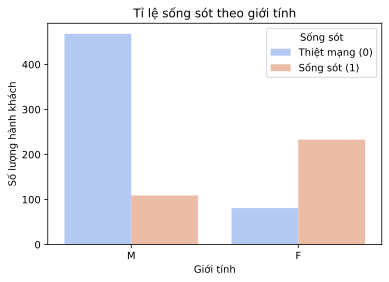

In [15]:
#12
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(data=tidisater, x="Sex", hue="Survived", palette="coolwarm")
plt.title("Tỉ lệ sống sót theo giới tính")
plt.xlabel("Giới tính")
plt.ylabel("Số lượng hành khách")
plt.legend(title="Sống sót", labels=["Thiệt mạng (0)", "Sống sót (1)"])
plt.show()
# Phụ nữ có tỉ lệ sống sót cao hơn nam giới

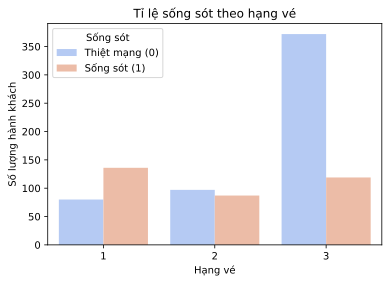

In [16]:
#13
plt.figure(figsize=(6, 4))
sns.countplot(data=tidisater, x="Pclass", hue="Survived", palette="coolwarm")
plt.title("Tỉ lệ sống sót theo hạng vé")
plt.xlabel("Hạng vé")
plt.ylabel("Số lượng hành khách")
plt.legend(title="Sống sót", labels=["Thiệt mạng (0)", "Sống sót (1)"])
plt.show()
#Hành khách hạng nhất sống sót nhiều nhất, hạng ba có tỉ lệ thiệt mạng cao

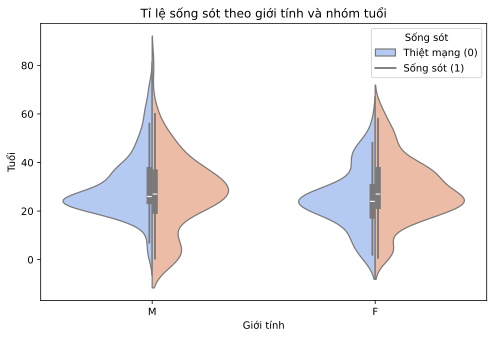

In [17]:
#14
plt.figure(figsize=(8, 5))
sns.violinplot(data=tidisater, x="Sex", y="Age", hue="Survived", split=True, palette="coolwarm")
plt.title("Tỉ lệ sống sót theo giới tính và nhóm tuổi")
plt.xlabel("Giới tính")
plt.ylabel("Tuổi")
plt.legend(title="Sống sót", labels=["Thiệt mạng (0)", "Sống sót (1)"])
plt.show()
#Người trẻ có cơ hội sống sót cao hơn, đặc biệt là phụ nữ

C:\Users\Admin\AppData\Local\Temp\ipykernel_18240\166178253.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tidisater, x="familySize", y="Survived", palette="coolwarm")


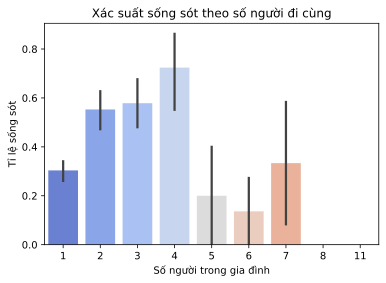

In [18]:
#15
plt.figure(figsize=(6, 4))
sns.barplot(data=tidisater, x="familySize", y="Survived", palette="coolwarm")
plt.title("Xác suất sống sót theo số người đi cùng")
plt.xlabel("Số người trong gia đình")
plt.ylabel("Tỉ lệ sống sót")
plt.show()
#Hành khách đi cùng gia đình có tỉ lệ sống sót cao hơn so với người đi một mình

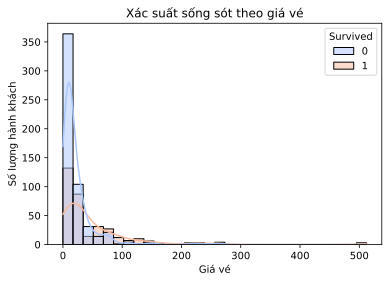

In [19]:
#16
plt.figure(figsize=(6, 4))
sns.histplot(data=tidisater, x="Fare", hue="Survived", kde=True, bins=30, palette="coolwarm")
plt.title("Xác suất sống sót theo giá vé")
plt.xlabel("Giá vé")
plt.ylabel("Số lượng hành khách")
plt.show()
#Hành khách mua vé đắt tiền có tỉ lệ sống sót cao hơn

<Figure size 800x500 with 0 Axes>

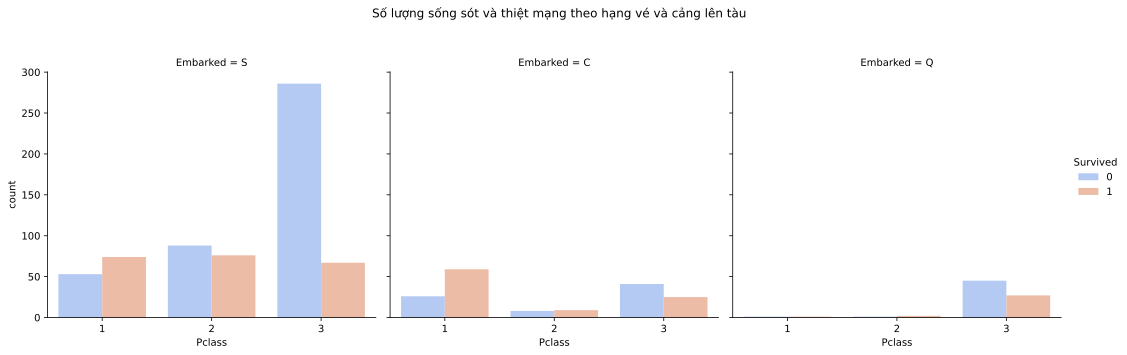

In [20]:
#17
plt.figure(figsize=(8, 5))
sns.catplot(data=tidisater, x="Pclass", hue="Survived", col="Embarked", kind="count", palette="coolwarm")
plt.subplots_adjust(top=0.8)
plt.suptitle("Số lượng sống sót và thiệt mạng theo hạng vé và cảng lên tàu")
plt.show()
#Cảng Cherbourg có nhiều hành khách hạng nhất hơn so với các cảng khác